# Quick Plot of Water Body Timeseries

In [1]:
%pylab notebook

import xarray as xr
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Which water body data would you like to plot up?

In [2]:
WaterID = 51080

## Plot it!

<IPython.core.display.Javascript object>


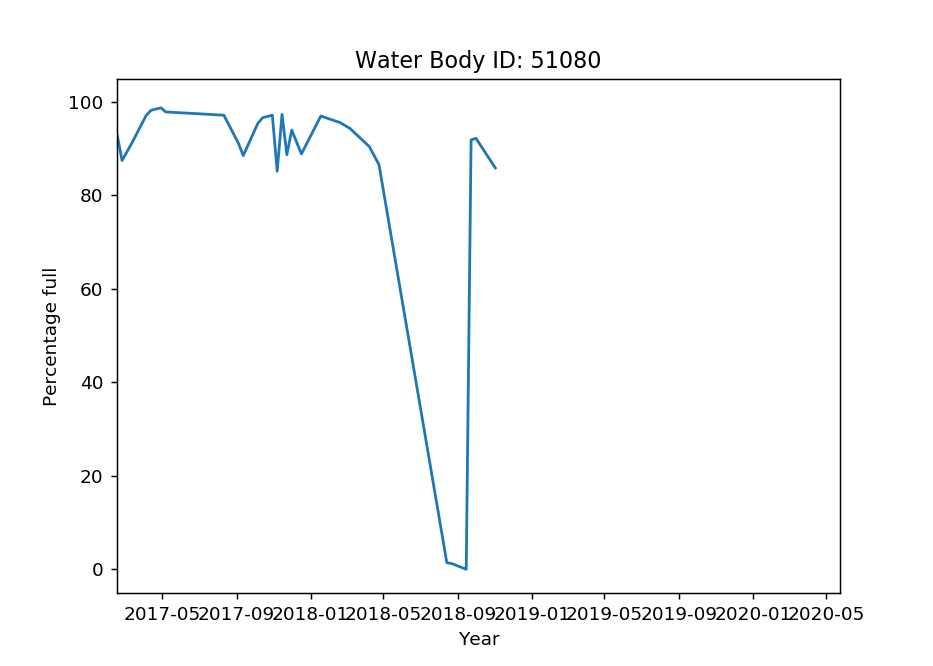

Text(0.5, 1.0, 'Water Body ID: 51080')

In [4]:
WaterBodyOfInterest = str(WaterID)

TimeHistory = pd.read_csv('/g/data/r78/cek156/dea-notebooks/Dams/Dams2000to2018/Timeseries_new/{}.csv'.format(WaterBodyOfInterest))

TimeHistory['Observation Date'] = pd.to_datetime(TimeHistory['Observation Date'])

plt.figure(figsize = [7,5])
plt.plot(TimeHistory['Observation Date'], TimeHistory['Wet pixel percentage'])
plt.xlabel('Year')
plt.ylabel('Percentage full')
plt.title('Water Body ID: {}'.format(WaterBodyOfInterest))